<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Introduction to neural network classification with TensorFlow**

In this notebook we're going to learn how to write nueral networks for classification problems

A few types of classification problems :  

  * Binary Classification
  * Multiclass classification
  * Multilabel classification
  



**Creating a data to view and fit**

In [52]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state=42)

In [53]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [54]:
#Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data is a little hard to understand right now...let's visualize it


In [55]:
import pandas as pd

circles = pd.DataFrame({"X0" :X[:, 0], "X1" : X[:, 1], "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


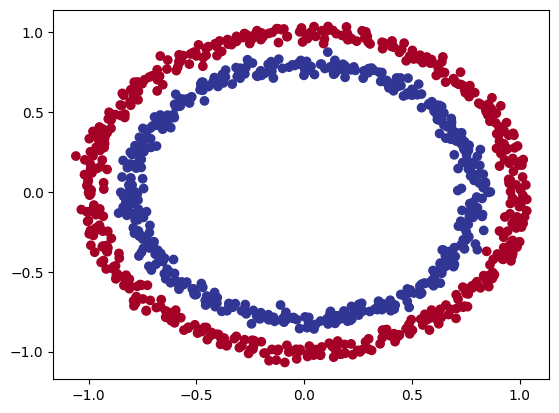

In [56]:
#visualize this with a plot

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.RdYlBu)

**Learning Tip :**

Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.](https://playground.tensorflow.org/)org building and running different neural networks. See what happens when you change different hyperparameters.


In [57]:
#Input and Output shapes of our neural networks

X.shape, y.shape

((1000, 2), (1000,))

In [58]:
#Check how many samples we are working with
len(X), len(y)

(1000, 1000)

In [59]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [60]:
import tensorflow as tf

tf.__version__

'2.14.0'

**STEPS IN MODELING WITH TENSORFLOW:**

* Now we are working with binary classification here in this case
* Create the model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak
* Evaluate





In [61]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 1.6232 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7341 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7079 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4850


In [62]:
#Let's try and improve our model for longer and see

model_1.fit(X, y, epochs = 200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on binary classification problem and our model is getting around 50% accuracy, it's performing as if it's guessing

so let's step things up a notch and add extra layer

In [63]:
# Set random seee
tf.random.set_seed(42)

#1. Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less



In [64]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

**Improving the model**

Let's look in to our bag of trics to improve our model

1. Create Model  - Add more layers and increase or decrease and increase the hidden units
2. Compile a model - Can change the SGD() to Adam
3. Fitting a model - Train for more time, increase the number of epochs




In [65]:
#Setting the random seed
tf.random.set_seed(42)

#1. Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#3. Fit the Model
model_3.fit(X,y, epochs = 100, verbose = 0)

In [66]:
#4. Evaluate the model
model_3.evaluate(X,y)     # still 50% accuracy we are getting the output


32/32 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5070


[0.6971699595451355, 0.5070000290870667]

In [67]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.48577297],
       [0.5586461 ],
       [0.5625028 ],
       [0.563692  ],
       [0.45272097],
       [0.5673182 ],
       [0.5492813 ],
       [0.48127934],
       [0.4880631 ],
       [0.5641633 ],
       [0.52273947],
       [0.52163285],
       [0.55575   ],
       [0.46236345],
       [0.45809534],
       [0.47121012],
       [0.5462872 ],
       [0.47412476],
       [0.55078816],
       [0.51401263],
       [0.50166124],
       [0.57916176],
       [0.47181413],
       [0.4885322 ],
       [0.5795156 ],
       [0.569774  ],
       [0.5417522 ],
       [0.465489  ],
       [0.46769178],
       [0.46050158],
       [0.49062452],
       [0.568105  ],
       [0.54731166],
       [0.46363795],
       [0.4721672 ],
       [0.5833826 ],
       [0.5672125 ],
       [0.52212006],
       [0.46834442],
       [0.50396055],
       [0.51050365],
       [0.53611535],
       [0.52051693],
       [0.46131337],
       [0.5307863 ],
       [0.5446726 ],
       [0.45795643],
       [0.536

To visualize our model predictions, let's create a function 'plot_decision_boundary()', this function will

* Take in the trained model, features(X), and abels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(Where each unique class falls)



In [68]:
import numpy as np

In [69]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 991us/step
doing binary classifcation...


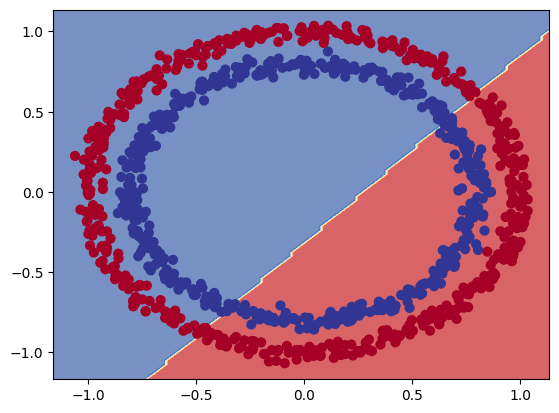

In [70]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)

# Let's see if our model can be used for regression model

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

#  split the data into training and test sets
X_reg_train = X_regression[ :150]
X_reg_test = X_regression[150: ]

y_reg_train = y_regression[ :150]
y_reg_test = y_regression[150 : ]

# fit the model to the regression model data
model_3.fit(X_reg_train, y_reg_train, epochs =100)








ValueError                                Traceback (most recent call last)
<ipython-input-40-f63aa7e296d7> in <cell line: 17>()
     15
     16 #fit the model to the regression model data
---> 17 model_3.fit(X_reg_train, y_reg_train, epochs =100)

1 frames
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py in tf__train_function(iterator)
     13                 try:
     14                     do_return = True
---> 15                     retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
     16                 except:
     17                     do_return = False

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Cannot iterate over a shape with unknown rank.
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=<unknown>, dtype=int32)
      • training=True
      • mask=None

In [71]:
tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

#split the data into training and test sets
X_reg_train = X_regression[ :150]
X_reg_test = X_regression[150: ]

y_reg_train = y_regression[ :150]
y_reg_test = y_regression[150 : ]

#fit the model to the regression model data
#model_3.fit(X_reg_train, y_reg_train, epochs =100)

Ohhh...wait now we compiled our model for binary classification problem but now we are working on regression problem, let's change the model to suit our model.


In [72]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 417.0438 - mae: 417.0438
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 343.0818 - mae: 343.0818
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 269.2923 - mae: 269.2923
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 189.7354 - mae: 189.7354
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 103.7898 - mae: 103.7898
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 48.5158 - mae: 48.5158
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 71.0967 - mae: 71.0967
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 62.8700 - mae: 62.8700
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 45.4408 - mae: 45.4408
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 48.1180 - mae: 48.1180
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 4ms/step


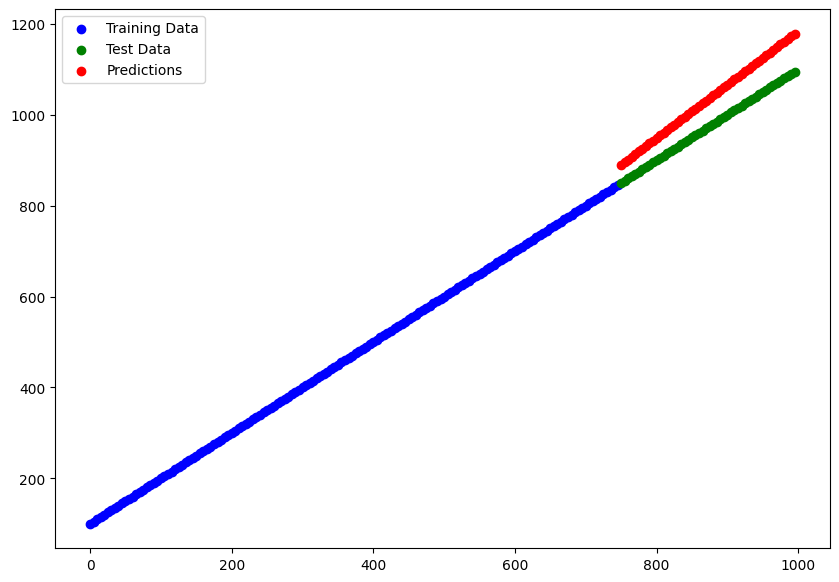

In [73]:
# Make predictions with our trained model

y_reg_preds = model_3.predict(X_reg_test)

#Plot the model's prediction against our regression data
plt.figure(figsize =(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c= 'g', label = "Test Data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "Predictions")
plt.legend();

## The missing peace : Non - **Leniearity**

In [74]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy']) # can also write it as loss = tf.keras.losses.BinaryCrossentropy

#3. Fit the model
history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.3087 - accuracy: 0.4690
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2722 - accuracy: 0.4710
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2618 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2535 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2466 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2313 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2025 - accuracy: 0.4650
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1940 - accuracy: 0.4650
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1582 - accuracy: 0.4650
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1229 - accuracy: 0.4650
Epoch 11/

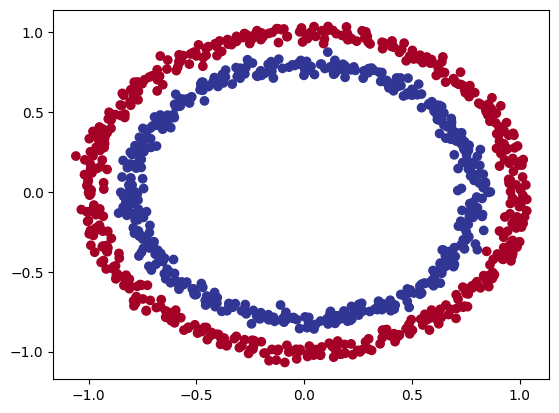

In [75]:
# Check out our data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap =plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


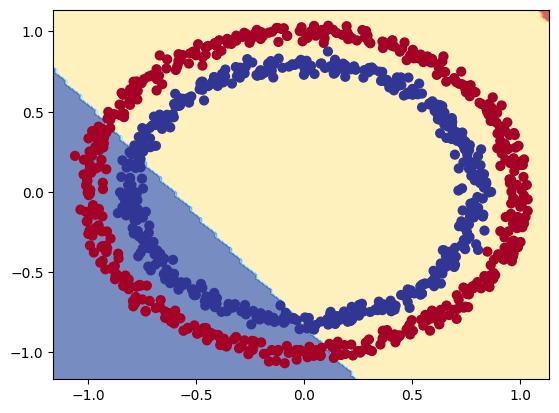

In [76]:
#Check the decision boundary

plot_decision_boundary(model_4, X=X, y=y)

**Let's try to build our first neural network with non linear activation function**

In [77]:
#Set random seed

tf.random.set_seed(42)

#1. Create a model with non linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu )
])

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])
#Fit the model

hostory = model_5.fit(X,y, epochs =100)



Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.3392 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2960 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2422 - accuracy: 0.4690
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1601 - accuracy: 0.4660
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0986 - accuracy: 0.4690
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0836 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0564 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0117 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9644 - accuracy: 0.4700
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9579 - accuracy: 0.4700
Epoch 11/

In [78]:
#Time to replicate the multilayer neural network from the TensorFlow playground

#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#3. Fit the model
history = model_6.fit(X, y, epochs =250)


Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.8973 - accuracy: 0.4780
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.2081 - accuracy: 0.4760
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0824 - accuracy: 0.4740
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0156 - accuracy: 0.4740
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9658 - accuracy: 0.4720
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9260 - accuracy: 0.4720
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8939 - accuracy: 0.4730
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8658 - accuracy: 0.4730
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8438 - accuracy: 0.4710
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8250 - accuracy: 0.4690
Epoch 11/

In [79]:
#Evaluate the model

model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9760


[0.07586825639009476, 0.9760000109672546]

313/313 [==============================] - 0s 973us/step
doing binary classifcation...


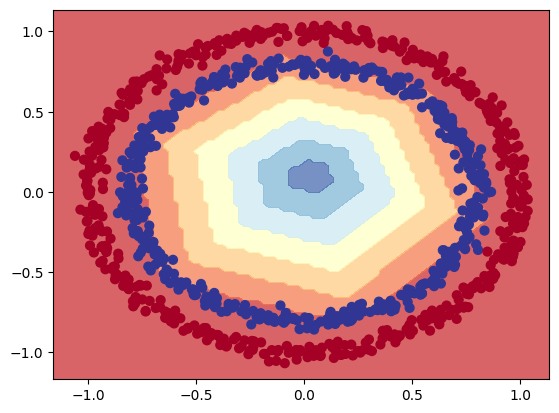

In [80]:
#Visualize the model prediction to have better idea

plot_decision_boundary(model_6,X,y)

In [81]:
#Let's create another model

#Set the ranodm seed
tf.random.set_seed(42)

#1. Create the Model with multiple layers and multiple activation functions and multiple activation functions
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
#2. Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#3. Fit the model
history = model_7.fit(X, y, epochs = 150)



Epoch 1/150
32/32 [==============================] - 1s 1ms/step - loss: 0.7031 - accuracy: 0.5000
Epoch 2/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4990
Epoch 3/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5010
Epoch 4/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5150
Epoch 5/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5160
Epoch 6/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5140
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5120
Epoch 8/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5110
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5110
Epoch 10/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5130
Epoch 11/

In [82]:
#4. Evaluate the model

model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2080 - accuracy: 0.9590


[0.2079988569021225, 0.9589999914169312]

313/313 [==============================] - 0s 995us/step
doing binary classifcation...


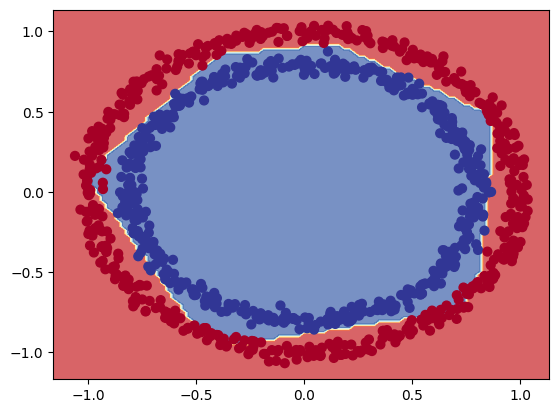

In [83]:
#Let's visualize classification

plot_decision_boundary(model_7, X, y)

**Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [84]:
# Create a toy tensor (Similar to the data we pass into our models)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

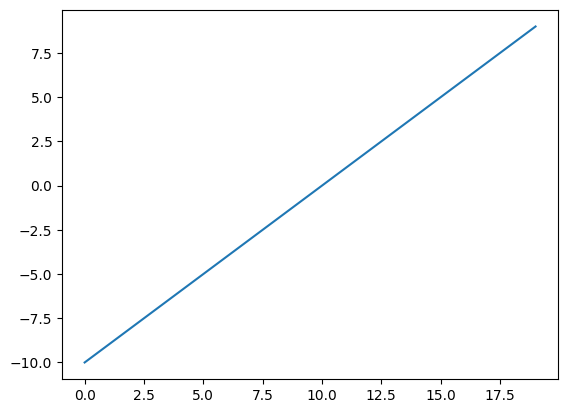

In [85]:
#Visualize our toy tensor
plt.plot(A)

In [86]:
# Let's start by replicating sigmoid - sigmoid(X) = 1 / (1 + exp(-x))

def sigmoid(x) :
  return 1/(1+tf.exp(-x))

#Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

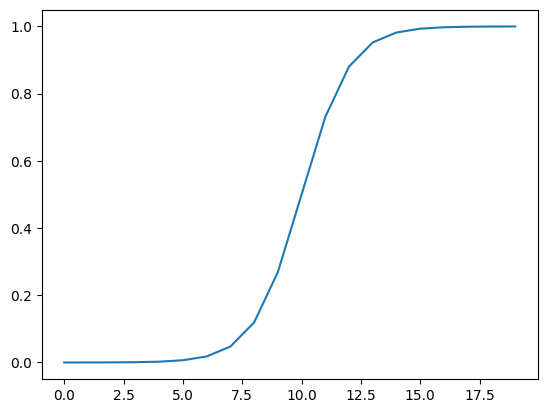

In [87]:
#plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [88]:
#Let's recreate the Relu Function

def relu(x):
  return tf.maximum(0,x)

#Let's pass our toy tensor to the relu
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

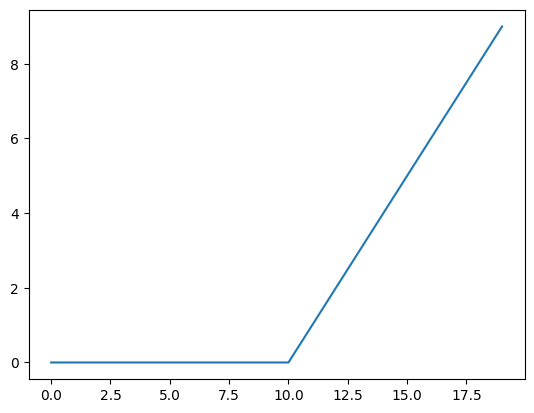

In [89]:
#Let's visualize the relu with tensor

plt.plot(relu(A))

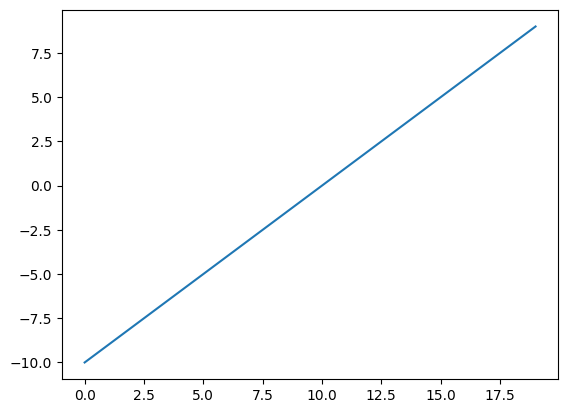

In [90]:
plt.plot(A)

In [91]:
#Let's try the linear activation function
# It returns the unmodified value

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

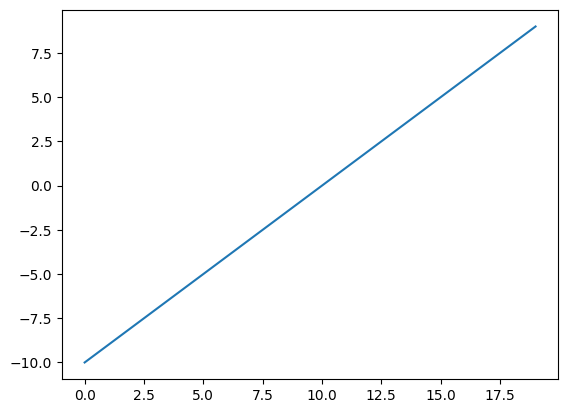

In [92]:
#Let's draw the same for the completeness

plt.plot(tf.keras.activations.linear(A))

In [93]:
A == tf.keras.activations.linear(A) # This did not change so it should return the true

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

**Evaluating and Improving our classification model**

So far we have been training and testing on the same dataset...

Howeer, in machine learning this is a sin

So let's create a training and test set


In [94]:
len(X)

1000

In [95]:
#Split the data into train and test sets

X_train, y_train = X[ :800], y[ :800]
X_test, y_test = X[ 800:], y[800: ]

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [96]:
#Let's recreate the model to fit on the training data and evaluate on the testset

#Set the random seed
tf.random.set_seed(42)

#1.Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#2. Compile the model

model_8.compile(loss = "binary_crossentropy", #tf.keras.losses.binary_crossentropy
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ["accuracy"])


#3.Fit the model
history = model_8.fit(X_train, y_train, epochs = 200)


Epoch 1/200
25/25 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.4988
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5050
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5038
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5113
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5213
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5200
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5225
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5387
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5437
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5412
Epoch 11/

In [97]:
# 4. Evaluate he model on test dataset

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9900


[0.13596075773239136, 0.9900000095367432]

313/313 [==============================] - 0s 993us/step
doing binary classifcation...
313/313 [==============================] - 0s 940us/step
doing binary classifcation...


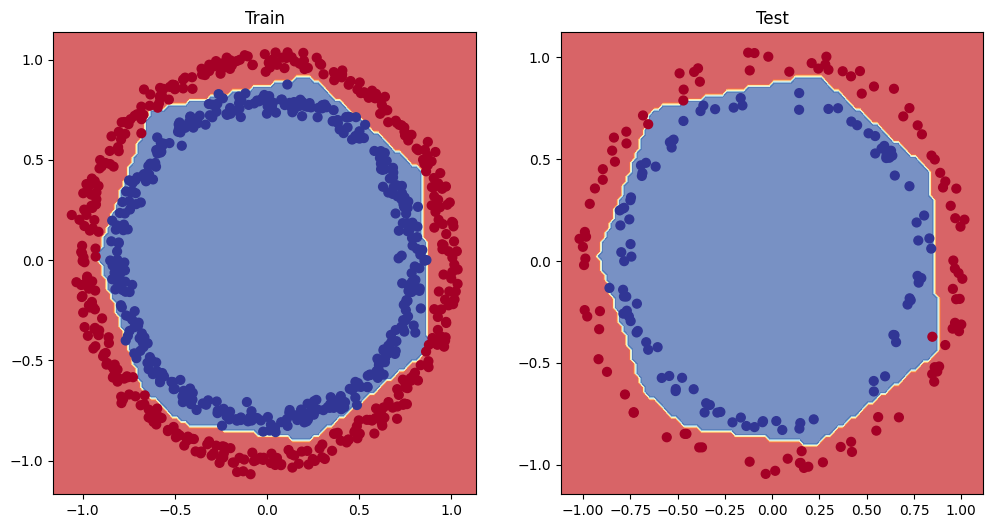

In [98]:
#Plot the decision boundary for the training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X = X_test, y = y_test)
plt.show()

In [99]:
# Plot the loss (or training) curves


In [100]:
history.history # tracks the accuracy and loss

{'loss': [0.6912063360214233,
  0.690223753452301,
  0.6895009875297546,
  0.6887961626052856,
  0.6881895661354065,
  0.6876300573348999,
  0.6869335770606995,
  0.6864092946052551,
  0.6859961748123169,
  0.685417890548706,
  0.6849741339683533,
  0.684526264667511,
  0.6839236617088318,
  0.6834026575088501,
  0.683040976524353,
  0.6824400424957275,
  0.6820387840270996,
  0.6814740896224976,
  0.6810318827629089,
  0.6804878115653992,
  0.6798818111419678,
  0.6792983412742615,
  0.6786353588104248,
  0.6779738068580627,
  0.6773430705070496,
  0.6766881346702576,
  0.6760642528533936,
  0.6751945614814758,
  0.6745976805686951,
  0.6736928820610046,
  0.672921359539032,
  0.6719875931739807,
  0.6710627675056458,
  0.670076310634613,
  0.6693999767303467,
  0.6680406332015991,
  0.6669358015060425,
  0.6661348938941956,
  0.6646578311920166,
  0.6636524796485901,
  0.6623802781105042,
  0.6608451008796692,
  0.6597025990486145,
  0.6582000255584717,
  0.6567256450653076,
  0.6553

In [101]:
#Make it a DataFrame
pd.DataFrame(history.history)


,loss,accuracy
0,0.691206,0.49875
1,0.690224,0.50500
2,0.689501,0.50375
3,0.688796,0.51125
4,0.688190,0.52125
...,...,...
195,0.132193,0.99375
196,0.131476,0.99375
197,0.130264,0.99125
198,0.129064,0.99500


Text(0.5, 1.0, 'Model_8 loss curves')

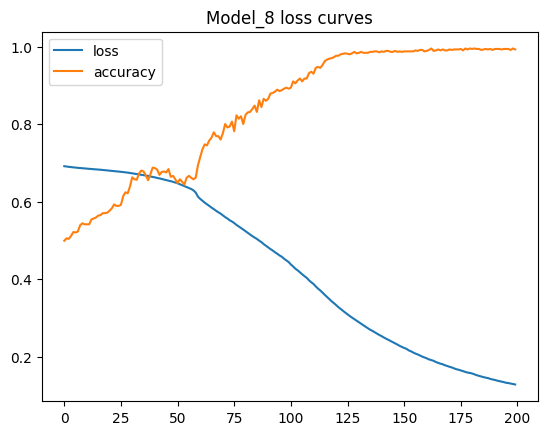

In [102]:
# Plot the loss cureves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note** : For many functions, if the loss function is going down it means it is getting improving(The prediction it's making are ground truth tables)


**Finding the best learning rate :**

To find the ideal learning rate (The learning rate where the loss decreases the most during the training) we're going to use the following steps :

* A Learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your **while it's training**
* Another model (We could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.


In [103]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#2. Compile the model

model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics  = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#4. Fit the model (Pass lr scheduler call back)

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs =100,
                        callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6987 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

<Axes: xlabel='epochs'>

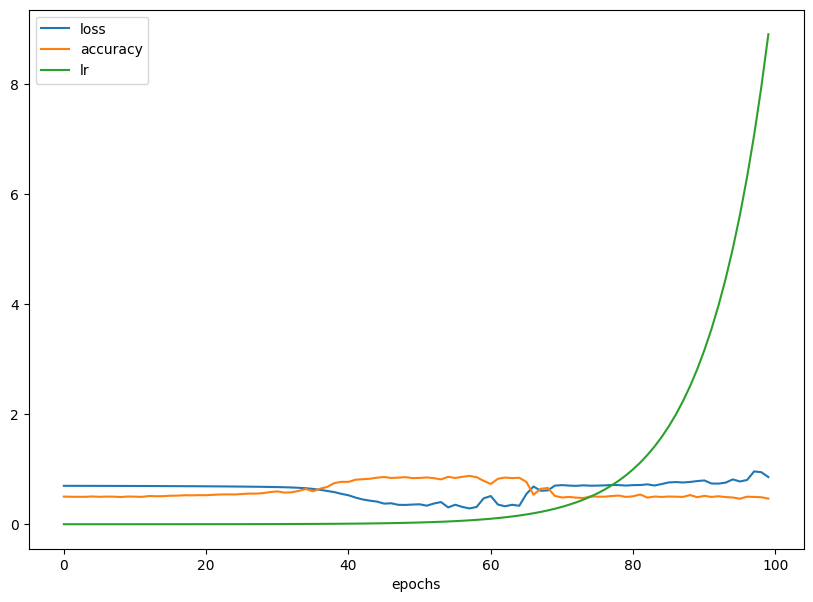

In [104]:
#check out the history

pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

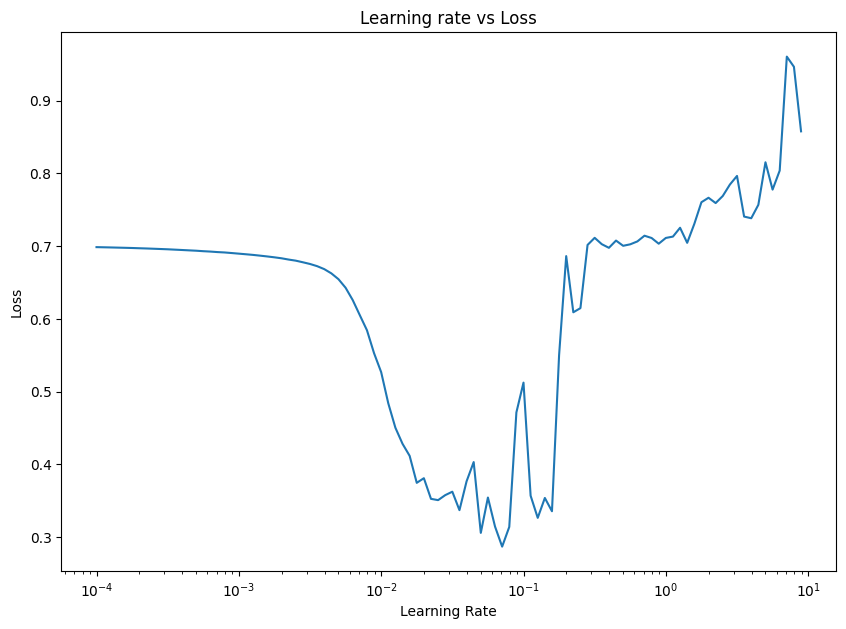

In [105]:
#Plot the learning rate versus the loss

lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.show()

In [106]:
len(lrs)

100

In [107]:
#Example of other typical learning rates values :

10**0, 10**-1, 10**-2, 10**-3, 1e-4, 1e-5, 10**-5

(1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-05)

In [108]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6941 - accuracy: 0.5138
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5500
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.6087
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.6338
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.6700
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.7725
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7525
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7788
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8313
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8562
Epoch 11/20
25/25 [

In [109]:
#Evaluate the model 10 on test dataset

model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9750


[0.12731584906578064, 0.9750000238418579]

313/313 [==============================] - 0s 926us/step
doing binary classifcation...
313/313 [==============================] - 0s 945us/step
doing binary classifcation...


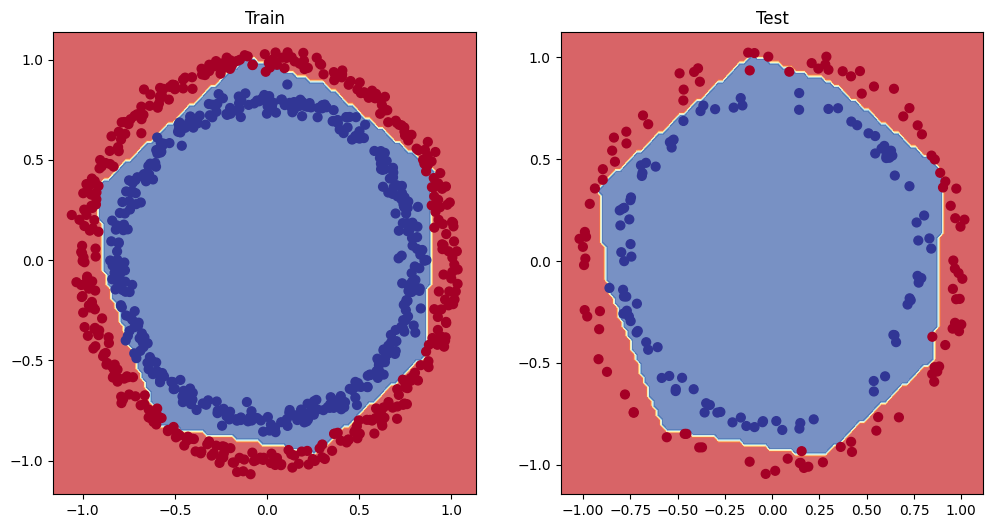

In [110]:
#Plot the decision boundaries for the  training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X = X_train, y= y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y= y_test)
plt.show()


## More Classification and evaluation methods

Alongside visualizing our models as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
  * Accuracy : Default metric for the classification problems. Not best for imbalanced classes.
  * Precision : Higher precision leads to less false positives
  * Recall : Higher recall leads to less false negatives
  * F1-score : Combination of precision and recall, usually good overall metric for the classification model
  * Confusion matrix : When comparing predictions to the truth labels to see where model get's confused. Can be hard to use with large number of classes.
  * Classification report (from scikit learn ) -  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html



In [111]:
# Check the accuracy of our model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy of the test set : {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9750
Model loss on the test set : 0.12731584906578064
Model accuracy of the test set : 97.50%


**How about a confusion matrix ?**

y_preds : looks like these y_preds our predictions array has come out in **predictions probability** form.. the standard output from the sigmoid (or softmax)

so now let's convert the prediction probabilities to binary format and view the first 10
* tf.round(y_preds)[:10]

In [112]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix

#Make  predictions
y_preds = tf.round(model_10.predict(X_test))

#Create a confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


array([[96,  5],
       [ 0, 99]])

How about we prettify our confusion matrix ?

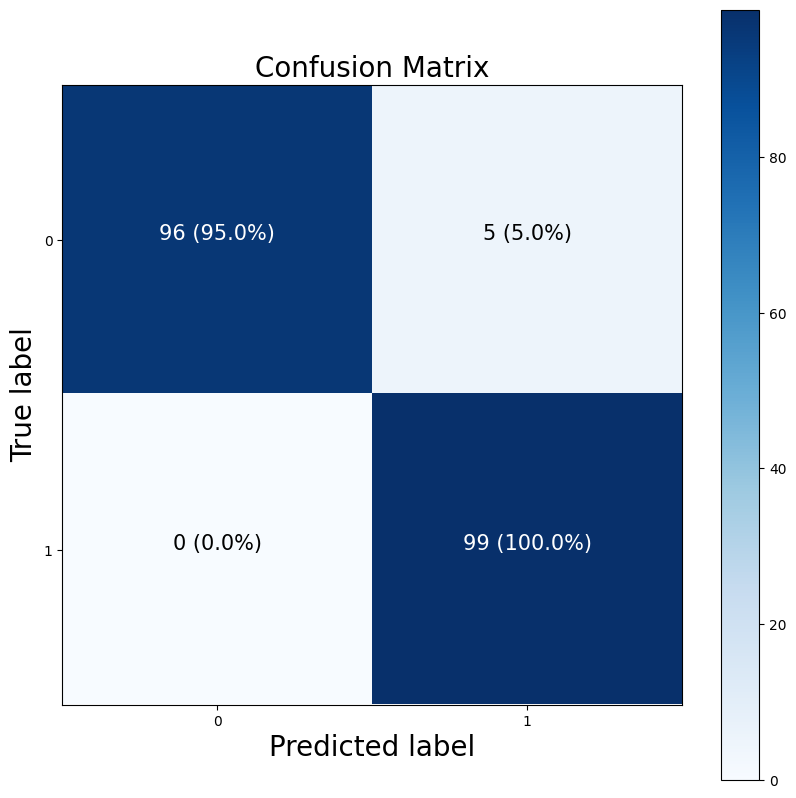

In [113]:
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


**Working with a larger example (Multiclass classification)**


When you have more than 2 classes as an option to be choosen, it's known as **multi class classification**

* This means if you have 3 different classes, it's multi-class classification

* This means if you have 100 different classes, it's multi-class classification


To Practice the multiclass classification we are going to build a neural network to classify images of different items of clothing.



In [114]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [115]:
#Show the first training example
print(f"Training sample :\n {train_data[0]}\n")
print(f"Training label : \n {train_labels[0]}\n")

Training sample :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [120]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

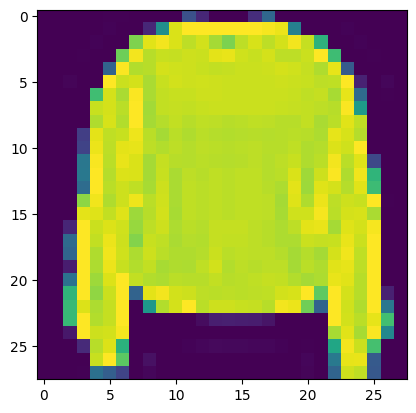

In [122]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [124]:
#Check out the sample labels
train_labels[7]

2

In [125]:
#Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

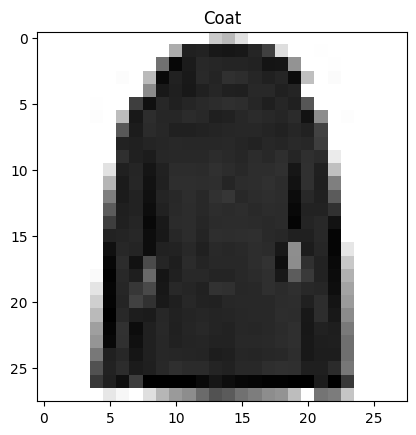

In [134]:
#plot an example image and it's image
index_of_choice =2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


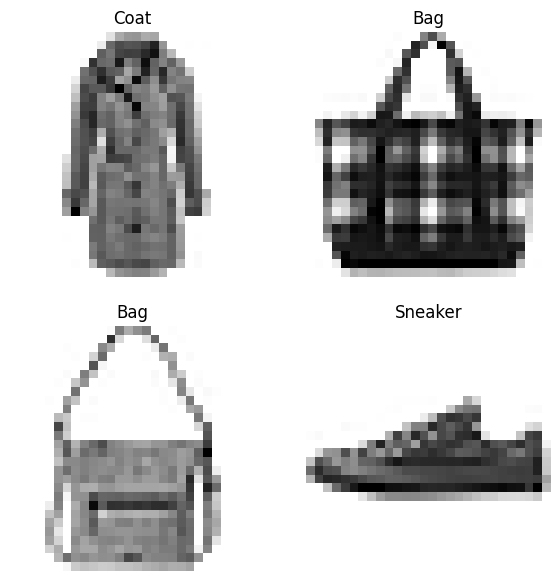

In [145]:
#Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

**Building a multiclass classification model**

For our multiclass classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things :

* Input- shape = 28,28 as we checked earlier
* Output- shape = 10 (10 classes and 1 per class)
* Loss function = CategoricalCrossentropy()
* Output Layer Activation = softmax (not sigmoid)
* If your labels are one hot encoded then use **CategoricalCrossentropy()**, If your labels are integer form use **SparseCategoricalCrossentropy**

**Note : Need to flatten our data for sure to go ahead in the neural networks**


In [146]:
#Set the seed
tf.random.set_seed(42)

#1. Create model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #flattens the entire 28, 28 into one flatten vector
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

#2. Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#3. Fit the model
history= model_11.fit(train_data,
                      train_labels,
                      epochs = 10,
                      validation_data=(test_data, test_labels)) # we can add this one also during the fit and we are using it for the first time, it also evalutes the test data during the training



Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9791 - accuracy: 0.2187 - val_loss: 1.7298 - val_accuracy: 0.2635
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6861 - accuracy: 0.2824 - val_loss: 1.6509 - val_accuracy: 0.2927
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6392 - accuracy: 0.2912 - val_loss: 1.6217 - val_accuracy: 0.2943
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6165 - accuracy: 0.2910 - val_loss: 1.6089 - val_accuracy: 0.2971
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6064 - accuracy: 0.2930 - val_loss: 1.6045 - val_accuracy: 0.2946
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5985 - accuracy: 0.2905 - val_loss: 1.5980 - val_accuracy: 0.2957
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5954 - accuracy: 0.2941 - val_loss: 1.5906 - val_accuracy:

In [147]:
#Check the model sammary
model_11.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_53 (Dense)            (None, 4)                 3140      
                                                                 
 dense_54 (Dense)            (None, 4)                 20        
                                                                 
 dense_55 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#